In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data_types import ChordType

In [63]:
cqt = pd.read_csv('./data_reduc/df_reduc_cqt.csv')
vqt = pd.read_csv('./data_reduc/df_reduc_vqt.csv')
mel = pd.read_csv('./data_reduc/df_reduc_mel.csv')
stft = pd.read_csv('./data_reduc/df_reduc_stft.csv')

print(vqt.columns)

Index(['Unnamed: 0', 'root', 'chord_type', 'inversion', 'dist_to_Cmaj',
       'dist_to_Cmaj_filtered', 'dist_to_Cmaj_peak', 'dist_to_Cmaj_inv1',
       'dist_to_Cmaj_filtered_inv1', 'dist_to_Cmaj_peak_inv1',
       'dist_to_Cmaj_inv2', 'dist_to_Cmaj_filtered_inv2',
       'dist_to_Cmaj_peak_inv2', 'dist_to_Cmin', 'dist_to_Cmin_filtered',
       'dist_to_Cmin_peak', 'dist_to_Cmin_inv1', 'dist_to_Cmin_filtered_inv1',
       'dist_to_Cmin_peak_inv1', 'dist_to_Cmin_inv2',
       'dist_to_Cmin_filtered_inv2', 'dist_to_Cmin_peak_inv2', 'dist_to_Cdim',
       'dist_to_Cdim_filtered', 'dist_to_Cdim_peak', 'dist_to_Cdim_inv1',
       'dist_to_Cdim_filtered_inv1', 'dist_to_Cdim_peak_inv1',
       'dist_to_Cdim_inv2', 'dist_to_Cdim_filtered_inv2',
       'dist_to_Cdim_peak_inv2', 'dist_to_Caug', 'dist_to_Caug_filtered',
       'dist_to_Caug_peak', 'dist_to_Caug_inv1', 'dist_to_Caug_filtered_inv1',
       'dist_to_Caug_peak_inv1', 'dist_to_Caug_inv2',
       'dist_to_Caug_filtered_inv2', 'dist_to

In [21]:
vqt.head()

,Unnamed: 0,root,chord_type,inversion,dist_to_Cmaj,dist_to_Cmaj_filtered,dist_to_Cmaj_peak,dist_to_Cmaj_inv1,dist_to_Cmaj_filtered_inv1,dist_to_Cmaj_peak_inv1,...,dist_to_Cdim_peak_inv2,dist_to_Caug,dist_to_Caug_filtered,dist_to_Caug_peak,dist_to_Caug_inv1,dist_to_Caug_filtered_inv1,dist_to_Caug_peak_inv1,dist_to_Caug_inv2,dist_to_Caug_filtered_inv2,dist_to_Caug_peak_inv2
0,0,-12,ChordType.AUGMENTED,0,0.567737,0.568918,0.526588,0.337147,0.339611,0.352880,...,0.825807,0.496203,0.497462,0.445675,0.216811,0.217427,0.236400,0.459748,0.460856,0.425150
1,1,-12,ChordType.MAJOR,0,0.476878,0.477811,0.420272,0.198100,0.198737,0.215983,...,0.833230,0.623373,0.624870,0.598402,0.381469,0.383924,0.404556,0.615741,0.618416,0.580185
2,2,-12,ChordType.DIMINISHED,0,0.721946,0.724373,0.717691,0.751970,0.760922,0.733061,...,0.348442,0.779244,0.781565,0.783207,0.784830,0.793332,0.772094,0.771029,0.774648,0.773986
3,3,-12,ChordType.MINOR,0,0.542040,0.543674,0.513990,0.493499,0.498009,0.478535,...,0.634678,0.760695,0.763147,0.761917,0.769785,0.777130,0.750581,0.751341,0.755470,0.751711
4,4,-12,ChordType.AUGMENTED,1,0.820585,0.823747,0.776813,0.706986,0.711758,0.665373,...,0.785528,0.836542,0.840478,0.820607,0.684312,0.687547,0.657225,0.808276,0.811988,0.784083


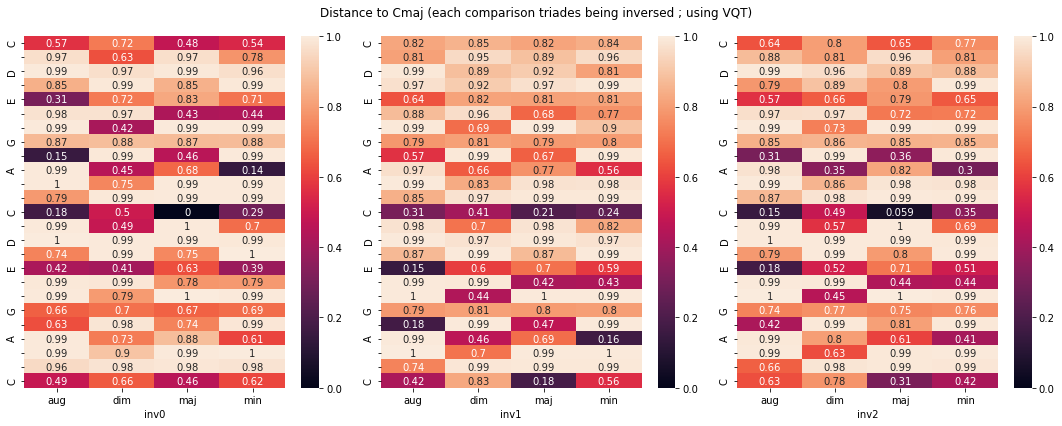

In [140]:
fig, axs = plt.subplots(1,3,figsize = (15,6))

for i in range (3):
    to_plot = vqt[vqt['inversion']==i].pivot(index='root', 
                        columns='chord_type', 
                        values='dist_to_Cmaj')
    
    xticklabels = ['aug', 'dim', 'maj', 'min']
    
    yticklabels = ['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C']
    
    sns.heatmap(to_plot, annot=True, vmin = 0, vmax = 1,
                xticklabels=xticklabels, yticklabels=yticklabels,
                ax = axs[i])
    axs[i].set(xlabel=f'inv{i}', ylabel='')

fig.suptitle('Distance to Cmaj (each comparison triades being inversed ; using VQT)')
fig.tight_layout()

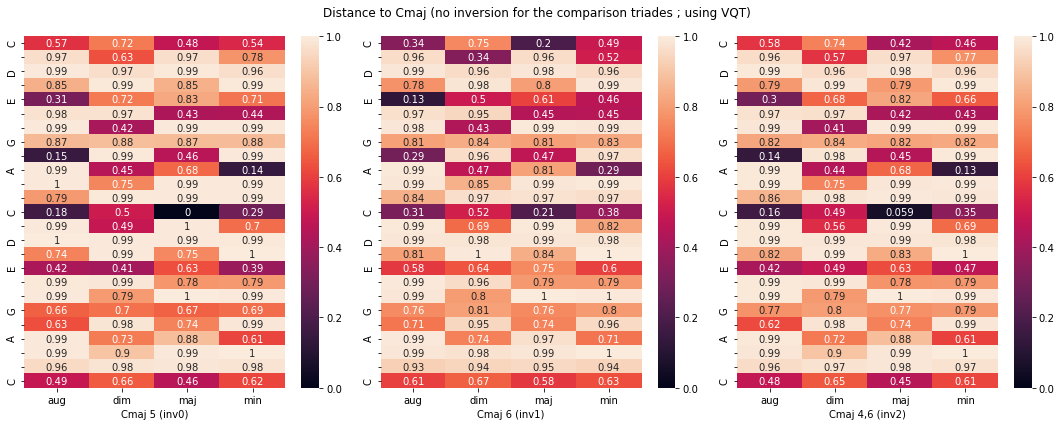

In [141]:
fig, axs = plt.subplots(1,3,figsize = (15,6))

to_plot_inv0 = vqt[vqt['inversion']==0].pivot(index='root', 
                    columns='chord_type', 
                    values='dist_to_Cmaj')
to_plot_inv1 = vqt[vqt['inversion']==0].pivot(index='root', 
                    columns='chord_type', 
                    values='dist_to_Cmaj_inv1')
to_plot_inv2 = vqt[vqt['inversion']==0].pivot(index='root', 
                    columns='chord_type', 
                    values='dist_to_Cmaj_inv2')


xticklabels = ['aug', 'dim', 'maj', 'min']
    
yticklabels = ['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C']
    
sns.heatmap(to_plot_inv0, annot=True, vmin = 0, vmax = 1,
            xticklabels=xticklabels, yticklabels=yticklabels,
            ax = axs[0])
sns.heatmap(to_plot_inv1, annot=True, vmin = 0, vmax = 1,
            xticklabels=xticklabels, yticklabels=yticklabels,
            ax = axs[1])
sns.heatmap(to_plot_inv2, annot=True, vmin = 0, vmax = 1,
            xticklabels=xticklabels, yticklabels=yticklabels,
            ax = axs[2])

axs[0].set(xlabel='Cmaj 5 (inv0)', ylabel='')
axs[1].set(xlabel='Cmaj 6 (inv1)', ylabel='')
axs[2].set(xlabel='Cmaj 4,6 (inv2)', ylabel='')
fig.suptitle('Distance to Cmaj (no inversion for the comparison triades ; using VQT)')    
fig.tight_layout()

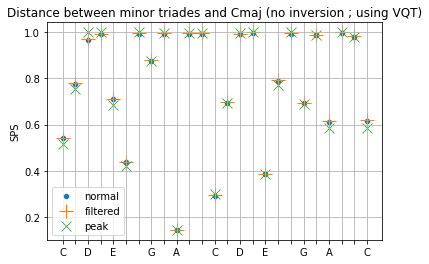

In [142]:
chord_type = 'ChordType.MINOR'
inversion = 0

ax = sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='normal', marker='o');
ax = sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_filtered', label='filtered', marker='+', s=200)
ax = sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_peak', label='peak', marker='x', s=100)

ax.set(title='Distance between minor triades and Cmaj (no inversion ; using VQT)',xlabel='', ylabel='SPS')
ax.set_xticks(np.arange(-12,13))
ax.set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
ax.grid()
plt.legend()
plt.show()

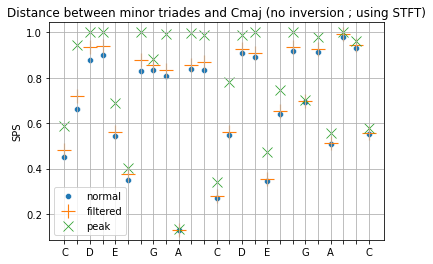

In [143]:
chord_type = 'ChordType.MINOR'
inversion = 0

ax = sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='normal', marker='o');
ax = sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_filtered', label='filtered', marker='+', s=200)
ax = sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_peak', label='peak', marker='x', s=100)

ax.set(title='Distance between minor triades and Cmaj (no inversion ; using STFT)',xlabel='', ylabel='SPS')
ax.set_xticks(np.arange(-12,13))
ax.set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
ax.grid()
plt.legend()
plt.show()

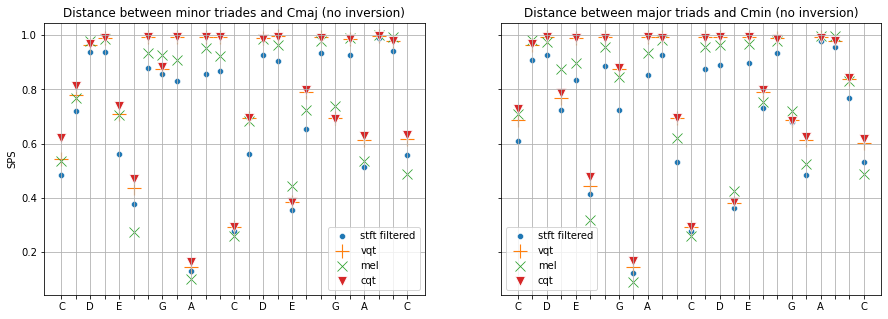

In [145]:
chord_type = 'ChordType.MINOR'
inversion = 0

fig, axs = plt.subplots(1,2, figsize=(15,5), sharey = True)

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_filtered', label='stft filtered', marker='o', ax=axs[0]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='vqt', marker='+', s=200, ax=axs[0])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='mel', marker='x', s=100, ax=axs[0])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmaj', label='cqt', marker='v', s=100, ax=axs[0])

axs[0].set(title='Distance between minor triades and Cmaj (no inversion)',xlabel='', ylabel='SPS')
axs[0].set_xticks(np.arange(-12,13))
axs[0].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[0].grid()


chord_type = 'ChordType.MAJOR'

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin_filtered', label='stft filtered', marker='o', ax = axs[1]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='vqt', marker='+', s=200, ax = axs[1])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='mel', marker='x', s=100, ax = axs[1])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmin', label='cqt', marker='v', s=100, ax = axs[1])

axs[1].set(title='Distance between major triads and Cmin (no inversion)',xlabel='', ylabel='SPS')
axs[1].set_xticks(np.arange(-12,13))
axs[1].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[1].grid()
plt.legend()
plt.show()

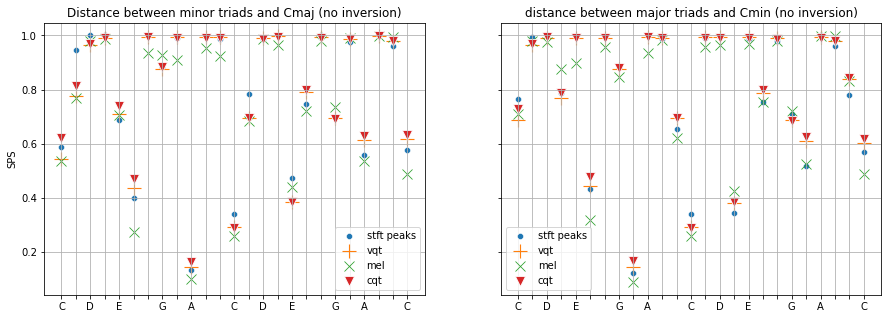

In [146]:
chord_type = 'ChordType.MINOR'
inversion = 0

fig, axs = plt.subplots(1,2, figsize=(15,5), sharey = True)

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj_peak', label='stft peaks', marker='o', ax=axs[0]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='vqt', marker='+', s=200, ax=axs[0])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmaj', label='mel', marker='x', s=100, ax=axs[0])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmaj', label='cqt', marker='v', s=100, ax=axs[0])

axs[0].set(title='Distance between minor triads and Cmaj (no inversion)',xlabel='', ylabel='SPS')
axs[0].set_xticks(np.arange(-12,13))
axs[0].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[0].grid()


chord_type = 'ChordType.MAJOR'

sns.scatterplot(data=stft.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin_peak', label='stft peaks', marker='o', ax = axs[1]);
sns.scatterplot(data=vqt.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='vqt', marker='+', s=200, ax = axs[1])
sns.scatterplot(data=mel.query('chord_type == @chord_type and inversion == @inversion'), 
                     x='root', y='dist_to_Cmin', label='mel', marker='x', s=100, ax = axs[1])
sns.scatterplot(data=cqt.query('chord_type == @chord_type'), 
                     x='root', y='dist_to_Cmin', label='cqt', marker='v', s=100, ax = axs[1])

axs[1].set(title='distance between major triads and Cmin (no inversion)',xlabel='', ylabel='SPS')
axs[1].set_xticks(np.arange(-12,13))
axs[1].set_xticklabels(['C','','D','','E','','','G','','A','','',
                    'C','','D','','E','','','G','','A','','',
                    'C'])
axs[1].grid()
plt.legend()
plt.show()

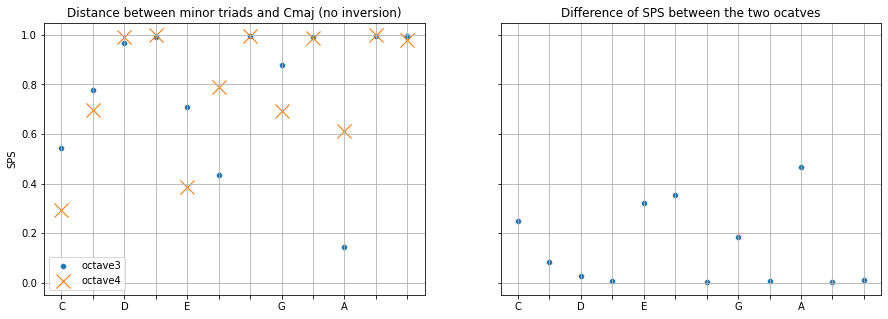

In [164]:
chord_type = 'ChordType.MINOR'
inversion = 0
range1 = np.arange(-12,0)
range2 = np.arange(0,12)

octave3 = vqt.query('chord_type == @chord_type and inversion == @inversion and root in @range1')['dist_to_Cmaj']
octave4 = vqt.query('chord_type == @chord_type and inversion == @inversion and root in @range2')['dist_to_Cmaj']
pc = np.arange(12)
diff = [np.abs(oc3-oc4) for oc3, oc4 in zip(list(octave3), list(octave4))]

fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.scatterplot(x=pc, y=octave3, label='octave3', marker='o', ax=axs[0])
sns.scatterplot(x=pc, y=octave4, label='octave4', marker='x', s=200, ax=axs[0])
axs[0].set(title='Distance between minor triads and Cmaj (no inversion)',xlabel='', ylabel='SPS')
axs[0].set_xticks(np.arange(12))
axs[0].set_xticklabels(['C','','D','','E','','','G','','A','',''])
axs[0].grid()
axs[0].legend()

sns.scatterplot(x=pc, y=diff, ax=axs[1])
axs[1].set(title='Difference of SPS between the two ocatves',xlabel='', ylabel='SPS')
axs[1].set_xticks(np.arange(12))
axs[1].set_xticklabels(['C','','D','','E','','','G','','A','',''])
axs[1].grid()

plt.show()